In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step-1: import the given file using appropriate pandas function, store it in a dataframe and read the first 3 rows.
'''IMP: There are 2 sheets in the given file i.e. App Store Games and Data Dictionary.
      Load App Store Games sheet for analysis. Pass the sheet name as an argument(sheet_name) to the function(read_excel).
      '''
games= pd.read_excel("/content/App Store Games English.xlsx",sheet_name= 0)
games.head(3)

#games.tail()



,App URL,App ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price per App (USD),Description,Developer,Age Rating,Languages,Size in Bytes,Primary Genre,Genres,Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-07-11
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-07-11
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-07-11


In [3]:
# Step-2: Check the shape of the dataset

games.shape # 17007 rows, 16 columns

(17007, 16)

In [4]:
# Step-3: Check the datatype of all the columns

games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   App URL              17007 non-null  object        
 1   App ID               17007 non-null  int64         
 2   Name                 17006 non-null  object        
 3   Subtitle             5257 non-null   object        
 4   Icon URL             17007 non-null  object        
 5   Average User Rating  7561 non-null   float64       
 6   User Rating Count    7561 non-null   float64       
 7   Price per App (USD)  17007 non-null  float64       
 8   Description          16990 non-null  object        
 9   Developer            17007 non-null  object        
 10  Age Rating           17007 non-null  object        
 11  Languages            17007 non-null  object        
 12  Size in Bytes        17006 non-null  float64       
 13  Primary Genre        17007 non-

In [5]:
games["App ID"].nunique()

16847

In [6]:
games.describe()

,App ID,Average User Rating,User Rating Count,Price per App (USD),Size in Bytes,Release Date
count,1.700700e+04,7561.000000,7.561000e+03,17007.000000,1.700600e+04,17007
mean,1.059614e+09,4.060905,3.306531e+03,0.812271,1.157064e+08,2016-03-04 18:55:41.541717760
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04,2008-07-11 00:00:00
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07,2014-09-23 00:00:00
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07,2016-07-09 00:00:00
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08,2017-12-07 00:00:00
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09,2019-10-26 00:00:00
std,2.999676e+08,0.751428,4.232256e+04,7.830260,2.036477e+08,NaN


In [7]:
# Step-4: Check the total no. of duplicate rows, remove them and also reset the index.

games.duplicated().sum() # 160 duplicated rows

updated= games.drop_duplicates()

updated.duplicated().sum() #0 duplicated rows

updated.reset_index(drop=True,inplace=True)




#games[games.duplicated()]



In [8]:
# Step-5: Check the no. of missing values in each column

updated.isna().sum()
updated[updated["Name"].isna()] # Index 3442 has a missing name


,App URL,App ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price per App (USD),Description,Developer,Age Rating,Languages,Size in Bytes,Primary Genre,Genres,Release Date
3442,https://apps.apple.com/us/app/negative/id84000...,840000894,NaN,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.0,Negative combines rhythm movements and mind re...,Pisit Wetchayanwiwat,4+,EN,16515072.0,Games,"Games, Strategy, Casual",2014-04-03


<Axes: title={'center': 'Distribution of missing values in various columns'}>

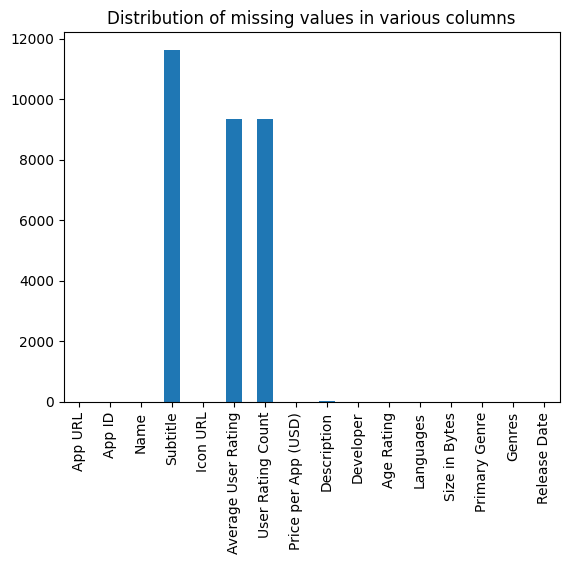

In [9]:
missing_values=updated.isna().sum()

missing_values.plot(kind="bar",title="Distribution of missing values in various columns")

In [10]:
# Step-6: Impute the missing values and explain your strategy for each column

#Name, Subtitle, Average User Rating, Average user rating count,description,size in counts are the columns that contain missing values

updated[updated["Name"].isna()] #index 3442 #840000894

#print(updated.iloc[3442])

updated.iloc[[3442],2]="Negative" # For name we can input the app url into the web and get its name. However, this URL wasn't working but since in all other columns
# the app name is coming after app/ in its url, so we can impute the name "negative" here.

#3442 is row index and 2 is column number for this row

# For subtitles, since they are specific strings of text, we can assign not given to those where they are blank

updated.iloc[16845]["Icon URL"]

#updated.info() # out of 16847 entries, subtitle has more than 60% of the column as missing values. Its better to drop it.


updated.drop("Subtitle",axis=1,inplace=True) #column dropped

updated.info()
updated.describe()

updated[updated["Average User Rating"].isna()] # For average user rating, lets create a histogram and check









<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16847 entries, 0 to 16846
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   App URL              16847 non-null  object        
 1   App ID               16847 non-null  int64         
 2   Name                 16847 non-null  object        
 3   Icon URL             16847 non-null  object        
 4   Average User Rating  7488 non-null   float64       
 5   User Rating Count    7488 non-null   float64       
 6   Price per App (USD)  16847 non-null  float64       
 7   Description          16830 non-null  object        
 8   Developer            16847 non-null  object        
 9   Age Rating           16847 non-null  object        
 10  Languages            16847 non-null  object        
 11  Size in Bytes        16846 non-null  float64       
 12  Primary Genre        16847 non-null  object        
 13  Genres               16847 non-

,App URL,App ID,Name,Icon URL,Average User Rating,User Rating Count,Price per App (USD),Description,Developer,Age Rating,Languages,Size in Bytes,Primary Genre,Genres,Release Date
10,https://apps.apple.com/us/app/quaddraxx/id2875...,287563734,Quaddraxx,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,Quaddraxx-Logic \u2013 Challenge your brain!\n...,H2F Informationssysteme GmbH,4+,EN,3089867.0,Games,"Games, Entertainment, Strategy, Puzzle",2008-08-11
21,https://apps.apple.com/us/app/ane-rouge/id2918...,291894818,Ane Rouge,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,Your Goal is to make leave the red square towa...,Jean-Francois Pautex,4+,"EN, FR",1190912.0,Games,"Games, Puzzle, Education, Strategy",2008-09-27
22,https://apps.apple.com/us/app/neiscat/id291929815,291929815,Neiscat,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.99,"Neiscat is an original strategy game, where yo...",Frederic Bronner,4+,"EN, FR",8806400.0,Games,"Games, Board, Entertainment, Strategy",2008-09-29
55,https://apps.apple.com/us/app/shogi-kifu/id302...,302532668,Shogi Kifu,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,3.99,This application is to record Shogi (Japanese ...,Yoshikazu Kakinoki,4+,"EN, JA",29797376.0,Games,"Games, Strategy, Board",2011-07-14
67,https://apps.apple.com/us/app/pahjong-tsunami/...,305260337,PahJong Tsunami,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.99,A very challenging combination of three classi...,John Gregorek,4+,EN,2974720.0,Games,"Games, Entertainment, Strategy, Casual",2009-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16842,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",2019-07-30
16843,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",2019-08-01
16844,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",2019-08-03
16845,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",2019-08-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16847 entries, 0 to 16846
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   App URL              16847 non-null  object        
 1   App ID               16847 non-null  int64         
 2   Name                 16847 non-null  object        
 3   Icon URL             16847 non-null  object        
 4   Average User Rating  16847 non-null  float64       
 5   User Rating Count    16847 non-null  float64       
 6   Price per App (USD)  16847 non-null  float64       
 7   Description          16847 non-null  object        
 8   Developer            16847 non-null  object        
 9   Age Rating           16847 non-null  object        
 10  Languages            16847 non-null  object        
 11  Size in Bytes        16847 non-null  float64       
 12  Primary Genre        16847 non-null  object        
 13  Genres               16847 non-

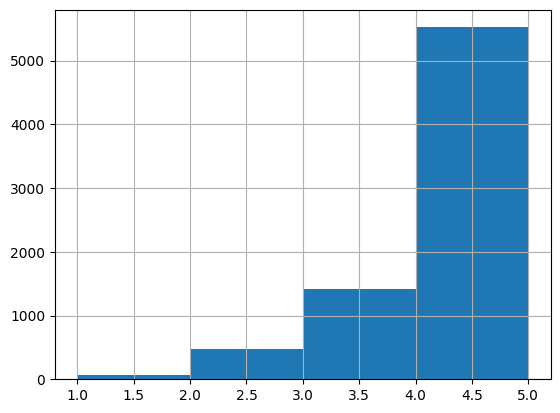

In [11]:
updated["Average User Rating"].hist(bins=4)

# The data is heavily skewed towards the bin of ratings which is 4-5. If we assign the missing values, the mean value of 4.06, it will only skew the data further towards this high end range. In this case, a median value of 3.5 would be sufficient.

updated["Average User Rating"].fillna(3.5,inplace= True)





"""We will set the user rating count missing values to somewhere between the median and upper quartile
values as the mean is very heavily influenced by the max value and won't be an accurate imputation. A probable value is 150 to fill in.

"""

updated["User Rating Count"].fillna(150,inplace=True)

""" Since descriptions are specific strings, we can look them up from the app url provided.
But since it isn't loading, lets fill it in with No Description Provided.

"""

updated["Description"].fillna("No description provided",inplace=True)

#updated.info()
#updated.describe()

""" Size in Bytes can also be calculated from going to the app URL. Since its not opening, lets just assign it the mean value."""

updated["Size in Bytes"].mean() #115818105

updated["Size in Bytes"].fillna(115818105,inplace=True)

updated.info()



In [12]:
# Step-7: Sort the DataFrame by 'Size in Bytes' column in decending order

updated.sort_values(by=["Size in Bytes"],ascending=False,inplace=True)






In [13]:
# Step-8: Create 3 new columns
# 1. 'Year' - > by extracting year from Release Date column
# HINT: df['Release Date'].dt.year

updated["Year"]= updated["Release Date"].dt.year

print(updated["Year"])

updated.head()

11849    2017
8313     2016
2128     2013
11618    2017
10367    2017
         ... 
1081     2012
593      2011
702      2011
226      2009
423      2010
Name: Year, Length: 16847, dtype: int32


,App URL,App ID,Name,Icon URL,Average User Rating,User Rating Count,Price per App (USD),Description,Developer,Age Rating,Languages,Size in Bytes,Primary Genre,Genres,Release Date,Year
11849,https://apps.apple.com/us/app/rome-total-war-a...,1245565445,ROME: Total War - Alexander,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.5,285.0,4.99,History\u2019s greatest military adventures al...,Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",4.005591e+09,Games,"Games, Simulation, Strategy",2017-07-26,2017
8313,https://apps.apple.com/us/app/rome-total-war/i...,1106831630,ROME: Total War,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,5.0,7050.0,9.99,"History\u2019s greatest empire, now in your ha...",Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",3.916692e+09,Games,"Games, Simulation, Strategy",2016-11-10,2016
2128,https://apps.apple.com/us/app/baldurs-gate-ii-...,633625517,"""Baldur's Gate II: EE""",https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,526.0,9.99,This game is optimized for tablets and not rec...,Overhaul Games,12+,EN,3.747743e+09,Games,"Games, Role Playing, Strategy",2013-12-25,2013
11618,https://apps.apple.com/us/app/sid-meiers-civil...,1235863443,"""Sid Meier's Civilization\xae VI""",https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,6856.0,0.00,Play 60 turns of Civilization VI for FREE! Tha...,"Aspyr Media, Inc.",12+,"EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, ZH",3.716898e+09,Games,"Games, Entertainment, Strategy, Simulation",2017-12-21,2017
10367,https://apps.apple.com/us/app/rome-total-war-b...,1183898700,ROME: Total War - BI,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.5,773.0,4.99,"Menaced by Barbarian hordes, the Roman Empire ...",Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",3.599436e+09,Games,"Games, Simulation, Strategy",2017-03-28,2017


In [14]:
updated.tail()

,App URL,App ID,Name,Icon URL,Average User Rating,User Rating Count,Price per App (USD),Description,Developer,Age Rating,Languages,Size in Bytes,Primary Genre,Genres,Release Date,Year
1081,https://apps.apple.com/us/app/tic-tac-toe/id49...,495029838,"Tic,Tac,Toe",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,38.0,0.0,Tic Tac Toe strategy game. The user can play ...,Tim Horling,4+,EN,318018.0,Games,"Games, Strategy, Puzzle, Entertainment",2012-03-10,2012
593,https://apps.apple.com/us/app/dyson-telescope-...,419584432,Dyson Telescope Game,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.5,18.0,0.0,"Use the telescopes to push, pull, block and re...",Dyson Inc.,4+,EN,289805.0,Games,"Games, Strategy, Puzzle",2011-02-24,2011
702,https://apps.apple.com/us/app/ching-chang-chon...,438044811,Ching Chang Chong,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,150.0,0.0,Ching Chang Chong das beste Spiel von allen. E...,JBStudio,4+,EN,241895.0,Games,"Games, Family, Entertainment, Strategy",2011-05-22,2011
226,https://apps.apple.com/us/app/solve-my-sudoku-...,347990652,Solve My Sudoku Penultimate,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.0,602.0,0.0,"Solves sudoku puzzles for you, either hint by ...",Bata Construction,4+,"EN, FR, DE, IT, JA, ES",215840.0,Entertainment,"Entertainment, Strategy, Games, Puzzle",2009-12-29,2009
423,https://apps.apple.com/us/app/tic-tac-toe/id39...,394633422,Tic Tac Toe,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,150.0,0.0,Tic Tac Toe ist nur eine kleine \xdcbungs-App ...,martiko.de,4+,EN,51328.0,Games,"Games, Board, Strategy",2010-10-05,2010


In [15]:
# 2. 'Paid or Free' -> using lambda function on 'Price per App (USD)' where price = 0 assign'Free' else 'Paid'.

#lamba x: x+1

#updated["Paid or Free"]= lambda: if :
                                   # updated["Price per App (USD)"]=0, "Free"
                              #  else:
                                #    "Paid"
updated["Paid or Free"]= updated["Price per App (USD)"].apply(lambda x: "Free" if x==0 else "Paid")

updated.head()





,App URL,App ID,Name,Icon URL,Average User Rating,User Rating Count,Price per App (USD),Description,Developer,Age Rating,Languages,Size in Bytes,Primary Genre,Genres,Release Date,Year,Paid or Free
11849,https://apps.apple.com/us/app/rome-total-war-a...,1245565445,ROME: Total War - Alexander,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.5,285.0,4.99,History\u2019s greatest military adventures al...,Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",4.005591e+09,Games,"Games, Simulation, Strategy",2017-07-26,2017,Paid
8313,https://apps.apple.com/us/app/rome-total-war/i...,1106831630,ROME: Total War,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,5.0,7050.0,9.99,"History\u2019s greatest empire, now in your ha...",Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",3.916692e+09,Games,"Games, Simulation, Strategy",2016-11-10,2016,Paid
2128,https://apps.apple.com/us/app/baldurs-gate-ii-...,633625517,"""Baldur's Gate II: EE""",https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,526.0,9.99,This game is optimized for tablets and not rec...,Overhaul Games,12+,EN,3.747743e+09,Games,"Games, Role Playing, Strategy",2013-12-25,2013,Paid
11618,https://apps.apple.com/us/app/sid-meiers-civil...,1235863443,"""Sid Meier's Civilization\xae VI""",https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,6856.0,0.00,Play 60 turns of Civilization VI for FREE! Tha...,"Aspyr Media, Inc.",12+,"EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, ZH",3.716898e+09,Games,"Games, Entertainment, Strategy, Simulation",2017-12-21,2017,Free
10367,https://apps.apple.com/us/app/rome-total-war-b...,1183898700,ROME: Total War - BI,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.5,773.0,4.99,"Menaced by Barbarian hordes, the Roman Empire ...",Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",3.599436e+09,Games,"Games, Simulation, Strategy",2017-03-28,2017,Paid


In [16]:
# 3. 'Revenue' -> 'User Rating Count' * 'Price per App (USD)'
updatedd= updated.copy()

updatedd["Revenue"]= updated["User Rating Count"]*updated["Price per App (USD)"]

updated.head()
updated["Revenue"]= updated["User Rating Count"]*updated["Price per App (USD)"]

del updatedd
updated.head()


,App URL,App ID,Name,Icon URL,Average User Rating,User Rating Count,Price per App (USD),Description,Developer,Age Rating,Languages,Size in Bytes,Primary Genre,Genres,Release Date,Year,Paid or Free,Revenue
11849,https://apps.apple.com/us/app/rome-total-war-a...,1245565445,ROME: Total War - Alexander,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.5,285.0,4.99,History\u2019s greatest military adventures al...,Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",4.005591e+09,Games,"Games, Simulation, Strategy",2017-07-26,2017,Paid,1422.15
8313,https://apps.apple.com/us/app/rome-total-war/i...,1106831630,ROME: Total War,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,5.0,7050.0,9.99,"History\u2019s greatest empire, now in your ha...",Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",3.916692e+09,Games,"Games, Simulation, Strategy",2016-11-10,2016,Paid,70429.50
2128,https://apps.apple.com/us/app/baldurs-gate-ii-...,633625517,"""Baldur's Gate II: EE""",https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,526.0,9.99,This game is optimized for tablets and not rec...,Overhaul Games,12+,EN,3.747743e+09,Games,"Games, Role Playing, Strategy",2013-12-25,2013,Paid,5254.74
11618,https://apps.apple.com/us/app/sid-meiers-civil...,1235863443,"""Sid Meier's Civilization\xae VI""",https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,6856.0,0.00,Play 60 turns of Civilization VI for FREE! Tha...,"Aspyr Media, Inc.",12+,"EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, ZH",3.716898e+09,Games,"Games, Entertainment, Strategy, Simulation",2017-12-21,2017,Free,0.00
10367,https://apps.apple.com/us/app/rome-total-war-b...,1183898700,ROME: Total War - BI,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.5,773.0,4.99,"Menaced by Barbarian hordes, the Roman Empire ...",Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",3.599436e+09,Games,"Games, Simulation, Strategy",2017-03-28,2017,Paid,3857.27


In [18]:
# Step 9: Convert the values in 'Size in Bytes' column into MB
# HINT: bytes to KB - > df['Size in Bytes']/1024
#         KB to MB - > df['Size in Bytes']/1024/1024

updated["Size in Bytes"]=updated["Size in Bytes"]/1024/1024
updated.head()

updated= updated.rename(columns={"Size in Bytes":"Size in MB"})
updated.head()

,App URL,App ID,Name,Icon URL,Average User Rating,User Rating Count,Price per App (USD),Description,Developer,Age Rating,Languages,Size in MB,Primary Genre,Genres,Release Date,Year,Paid or Free,Revenue
11849,https://apps.apple.com/us/app/rome-total-war-a...,1245565445,ROME: Total War - Alexander,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.5,285.0,4.99,History\u2019s greatest military adventures al...,Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",3820.029297,Games,"Games, Simulation, Strategy",2017-07-26,2017,Paid,1422.15
8313,https://apps.apple.com/us/app/rome-total-war/i...,1106831630,ROME: Total War,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,5.0,7050.0,9.99,"History\u2019s greatest empire, now in your ha...",Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",3735.249023,Games,"Games, Simulation, Strategy",2016-11-10,2016,Paid,70429.50
2128,https://apps.apple.com/us/app/baldurs-gate-ii-...,633625517,"""Baldur's Gate II: EE""",https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,526.0,9.99,This game is optimized for tablets and not rec...,Overhaul Games,12+,EN,3574.125977,Games,"Games, Role Playing, Strategy",2013-12-25,2013,Paid,5254.74
11618,https://apps.apple.com/us/app/sid-meiers-civil...,1235863443,"""Sid Meier's Civilization\xae VI""",https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,6856.0,0.00,Play 60 turns of Civilization VI for FREE! Tha...,"Aspyr Media, Inc.",12+,"EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, ZH",3544.709961,Games,"Games, Entertainment, Strategy, Simulation",2017-12-21,2017,Free,0.00
10367,https://apps.apple.com/us/app/rome-total-war-b...,1183898700,ROME: Total War - BI,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.5,773.0,4.99,"Menaced by Barbarian hordes, the Roman Empire ...",Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",3432.689453,Games,"Games, Simulation, Strategy",2017-03-28,2017,Paid,3857.27


In [19]:
# Step 10: Rename the columns to lowercase and remove spaces also change 'Size in Bytes' to 'Size (MB)'

updated.columns=updated.columns.str.lower().str.strip().str.replace(" ","_") #updated.columns gives you column labels or all column names #strip and trim basically the same thing
updated.head()

# Column already renamed in previous step


,app_url,app_id,name,icon_url,average_user_rating,user_rating_count,price_per_app_(usd),description,developer,age_rating,languages,size_in_mb,primary_genre,genres,release_date,year,paid_or_free,revenue
11849,https://apps.apple.com/us/app/rome-total-war-a...,1245565445,ROME: Total War - Alexander,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.5,285.0,4.99,History\u2019s greatest military adventures al...,Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",3820.029297,Games,"Games, Simulation, Strategy",2017-07-26,2017,Paid,1422.15
8313,https://apps.apple.com/us/app/rome-total-war/i...,1106831630,ROME: Total War,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,5.0,7050.0,9.99,"History\u2019s greatest empire, now in your ha...",Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",3735.249023,Games,"Games, Simulation, Strategy",2016-11-10,2016,Paid,70429.50
2128,https://apps.apple.com/us/app/baldurs-gate-ii-...,633625517,"""Baldur's Gate II: EE""",https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,526.0,9.99,This game is optimized for tablets and not rec...,Overhaul Games,12+,EN,3574.125977,Games,"Games, Role Playing, Strategy",2013-12-25,2013,Paid,5254.74
11618,https://apps.apple.com/us/app/sid-meiers-civil...,1235863443,"""Sid Meier's Civilization\xae VI""",https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,6856.0,0.00,Play 60 turns of Civilization VI for FREE! Tha...,"Aspyr Media, Inc.",12+,"EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, ZH",3544.709961,Games,"Games, Entertainment, Strategy, Simulation",2017-12-21,2017,Free,0.00
10367,https://apps.apple.com/us/app/rome-total-war-b...,1183898700,ROME: Total War - BI,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.5,773.0,4.99,"Menaced by Barbarian hordes, the Roman Empire ...",Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",3432.689453,Games,"Games, Simulation, Strategy",2017-03-28,2017,Paid,3857.27


In [20]:
# Step 11: Creating a new column 'size_buckets' for Size Buckets using a custom function
'''HINT:
     (if size(MB) < 100)        -> 'Under 100MB'
    (if 100 <= size(MB) < 500)  -> '100 - 500MB'
    (if 500 <= size(MB) < 1024) -> '500 - 1GB'
             else               -> 'Above 1GB'
'''
def size_buckets(size_in_mb):
  """

  Args:
    size_in_mb:

  Returns:

  """
  if size_in_mb<100:
    return "Under 100MB"
  elif size_in_mb<500:
    return "100-500MB"
  elif size_in_mb<1024:
    return "500-1GB"
  else:
    return "Above 1GB"

updated["size_buckets"]= updated["size_in_mb"].apply(size_buckets)

updated.head()





,app_url,app_id,name,icon_url,average_user_rating,user_rating_count,price_per_app_(usd),description,developer,age_rating,languages,size_in_mb,primary_genre,genres,release_date,year,paid_or_free,revenue,size_buckets
11849,https://apps.apple.com/us/app/rome-total-war-a...,1245565445,ROME: Total War - Alexander,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.5,285.0,4.99,History\u2019s greatest military adventures al...,Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",3820.029297,Games,"Games, Simulation, Strategy",2017-07-26,2017,Paid,1422.15,Above 1GB
8313,https://apps.apple.com/us/app/rome-total-war/i...,1106831630,ROME: Total War,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,5.0,7050.0,9.99,"History\u2019s greatest empire, now in your ha...",Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",3735.249023,Games,"Games, Simulation, Strategy",2016-11-10,2016,Paid,70429.50,Above 1GB
2128,https://apps.apple.com/us/app/baldurs-gate-ii-...,633625517,"""Baldur's Gate II: EE""",https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,526.0,9.99,This game is optimized for tablets and not rec...,Overhaul Games,12+,EN,3574.125977,Games,"Games, Role Playing, Strategy",2013-12-25,2013,Paid,5254.74,Above 1GB
11618,https://apps.apple.com/us/app/sid-meiers-civil...,1235863443,"""Sid Meier's Civilization\xae VI""",https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,6856.0,0.00,Play 60 turns of Civilization VI for FREE! Tha...,"Aspyr Media, Inc.",12+,"EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, ZH",3544.709961,Games,"Games, Entertainment, Strategy, Simulation",2017-12-21,2017,Free,0.00,Above 1GB
10367,https://apps.apple.com/us/app/rome-total-war-b...,1183898700,ROME: Total War - BI,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.5,773.0,4.99,"Menaced by Barbarian hordes, the Roman Empire ...",Feral Interactive Ltd,12+,"EN, FR, DE, IT, RU, ES",3432.689453,Games,"Games, Simulation, Strategy",2017-03-28,2017,Paid,3857.27,Above 1GB


In [21]:
# Step 12: Check the value counts in each size bucket

updated["size_buckets"].value_counts()



,count
size_buckets,
Under 100MB,11508
100-500MB,4850
500-1GB,360
Above 1GB,129


In [22]:
# Step 13: Drop the columns not required in analysis
'''
Icon URL
Developer
App URL
Description
Languages
Genres
Release Date
Size (MB)'''



'\nIcon URL\nDeveloper\nApp URL\nDescription\nLanguages\nGenres\nRelease Date\nSize (MB)'

In [23]:
updated["primary_genre"].value_counts()

,count
primary_genre,
Games,16135
Education,217
Entertainment,197
Utilities,77
Sports,60
Reference,32
Stickers,29
Finance,18
Business,16


<Axes: title={'center': 'Number of Games launched each year'}, xlabel='Years', ylabel='Number of Games'>

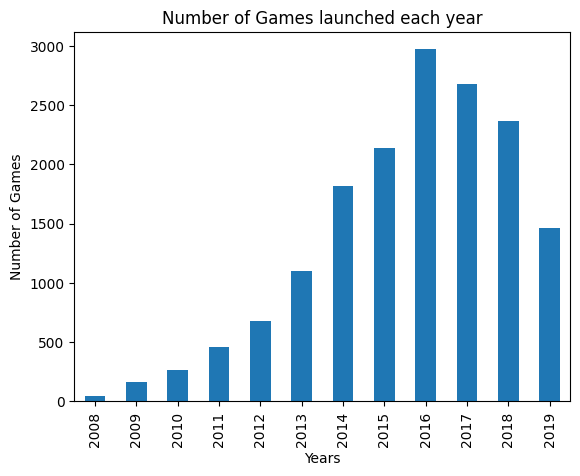

In [24]:
# Step 14: Show the no. of Games launched each year using a bar graph

#updated["year"].plot(kind="bar",title="Number of Games launched each year",xlabel= "Years",ylabel="Number of Games")
games_only= updated[updated["primary_genre"]=="Games"]
games_only.head()

plot= games_only.groupby("year").size()
plot.plot(kind="bar",title="Number of Games launched each year",xlabel= "Years",ylabel="Number of Games")


<Axes: title={'center': 'Revenue by year'}, xlabel='Years', ylabel='Revenue'>

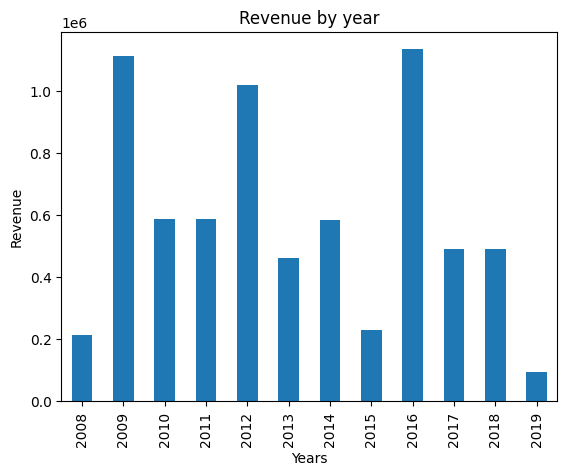

In [25]:
# Step 15: Calculate Revenue by year, save in a subset and plot using a bar graph
revenue_yearly= updated.groupby("year")["revenue"].sum()
revenue_yearly.plot(kind="bar",title="Revenue by year",xlabel= "Years",ylabel="Revenue")




<Axes: title={'center': 'Top 10 Games by Rating Count'}, xlabel='Game Name', ylabel='Number of users who rated'>

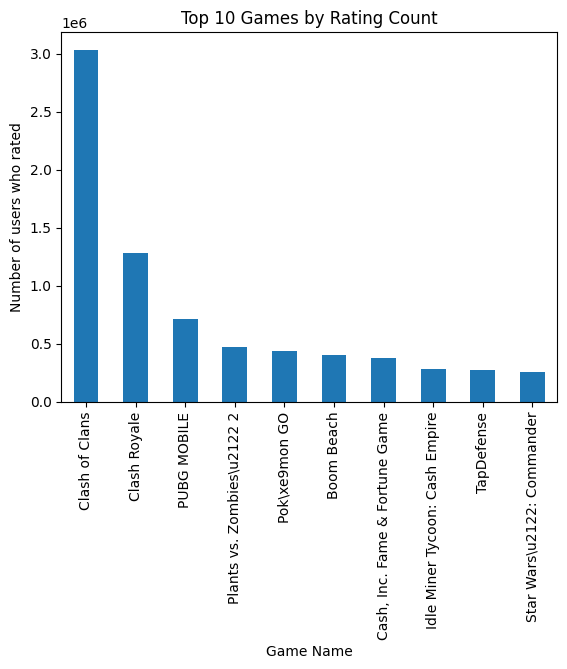

In [26]:
# Step 16: Use the groupby function to show top 10 Games by Rating Count

games_filtered= updated[updated["primary_genre"]=="Games"]
games_filtered.head()

ratings= games_filtered.groupby("name")["user_rating_count"].sum()

top_10 = ratings.nlargest(10)

top_10.plot(kind="bar", title="Top 10 Games by Rating Count",xlabel= "Game Name",ylabel="Number of users who rated")




In [27]:
# Step 13: Drop the columns not required in analysis
'''
Icon URL
Developer
App URL
Description
Languages
Genres
Release Date
Size (MB)'''

updated_drop= updated.copy()

updated_drop=  updated_drop.drop(columns=["icon_url",
"developer",
"app_url",
"description",
"languages",
"genres",
"release_date","size_in_mb"])

updated_drop.head()

del updated_drop

updated= updated.drop(columns=["icon_url",
"developer",
"app_url",
"description",
"languages",
"genres",
"release_date","size_in_mb"])

updated.head()


,app_id,name,average_user_rating,user_rating_count,price_per_app_(usd),age_rating,primary_genre,year,paid_or_free,revenue,size_buckets
11849,1245565445,ROME: Total War - Alexander,4.5,285.0,4.99,12+,Games,2017,Paid,1422.15,Above 1GB
8313,1106831630,ROME: Total War,5.0,7050.0,9.99,12+,Games,2016,Paid,70429.50,Above 1GB
2128,633625517,"""Baldur's Gate II: EE""",4.0,526.0,9.99,12+,Games,2013,Paid,5254.74,Above 1GB
11618,1235863443,"""Sid Meier's Civilization\xae VI""",3.5,6856.0,0.00,12+,Games,2017,Free,0.00,Above 1GB
10367,1183898700,ROME: Total War - BI,4.5,773.0,4.99,12+,Games,2017,Paid,3857.27,Above 1GB
